In [19]:
import networkx as nx
import random
import matplotlib
import matplotlib.pyplot as plt

from dbst_mip import *

## Hilfsroutinen
Zur Generierung von Instanzen und Erzeugung/Sortierung der Kantenmenge.

In [20]:
def random_points(n, w=10_000, h=10_000) -> Set[Node]:
    """
    n random points with integer coordinates within the w * h rectangle.
    :param n: Number of points
    :param w: The width of the rectangle.
    :param h: The height of the rectangle.
    :return: A set of points as (x,y)-tuples.
    """
    return set((random.randint(0,w), random.randint(0,h)) for _ in range(n))

In [21]:
points = random_points(50)
degree = 3

In [22]:
def filter_edges(edges, max_sq_length):
    """
    Return a filtered copy of the given edgelist, filtered by squared length.
    """
    return [e for e in edges if squared_distance(*e) <= max_sq_length]

# Use greedy to eliminate as many edges as possible preemptively
greedy_alg = GreedyDBST(points, degree)
greedy_tree = greedy_alg.solve()
remaining_edges = filter_edges(greedy_alg.all_edges, greedy_alg.max_sq_length)
edges_left_perc = round(100.0 * len(remaining_edges) / len(greedy_alg.all_edges), 3)
print(f"The greedy algorithm managed to reduce the number of edges in question to {edges_left_perc}% of the graph!")

Greedy bottleneck: 2211.790677256779
The greedy algorithm managed to reduce the number of edges in question to 15.755% of the graph!


### "Old" problem. Only find the bottleneck-minimal DBST.

Set parameter LazyConstraints to value 1
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 12 physical cores, 24 logical processors, using up to 24 threads
Optimize a model with 294 rows, 194 columns and 1351 nonzeros
Model fingerprint: 0xf15bc0d2
Variable types: 1 continuous, 193 integer (193 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 2e+03]
  RHS range        [1e+00, 5e+01]
Presolve removed 206 rows and 4 columns
Presolve time: 0.00s
Presolved: 88 rows, 190 columns, 926 nonzeros
Variable types: 0 continuous, 190 integer (190 binary)

Root relaxation: objective 2.211791e+03, 62 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 2211.79068    0    6          - 2211.79068      -     -    0s
     0     0 2211.79068    0    4      

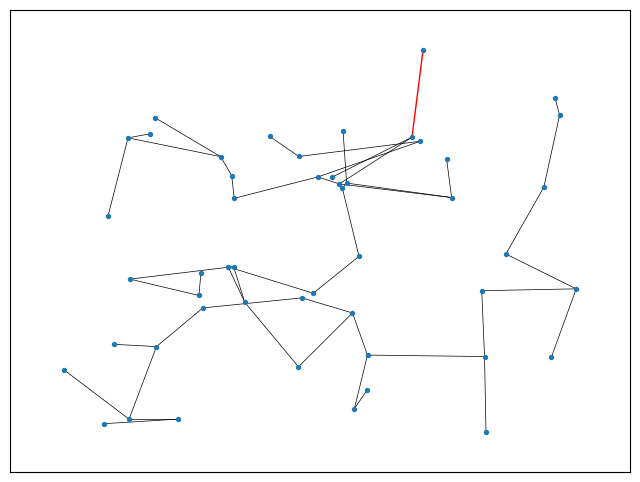

In [23]:
solution_dbst = DBSTSolverIP(points, remaining_edges, degree).solve(minsum=False)
draw_edges(solution_dbst)

### "New" problem. Find the bottleneck and then minimize the rest of the tree as well. This can take SIGNIFICANTLY more time. You might want to implement a time limit.

Set parameter LazyConstraints to value 1
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 12 physical cores, 24 logical processors, using up to 24 threads
Optimize a model with 294 rows, 194 columns and 1351 nonzeros
Model fingerprint: 0xf15bc0d2
Variable types: 1 continuous, 193 integer (193 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 2e+03]
  RHS range        [1e+00, 5e+01]
Presolve removed 206 rows and 4 columns
Presolve time: 0.00s
Presolved: 88 rows, 190 columns, 926 nonzeros
Variable types: 0 continuous, 190 integer (190 binary)

Root relaxation: objective 2.211791e+03, 62 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 2211.79068    0    6          - 2211.79068      -     -    0s
     0     0 2211.79068    0    4      

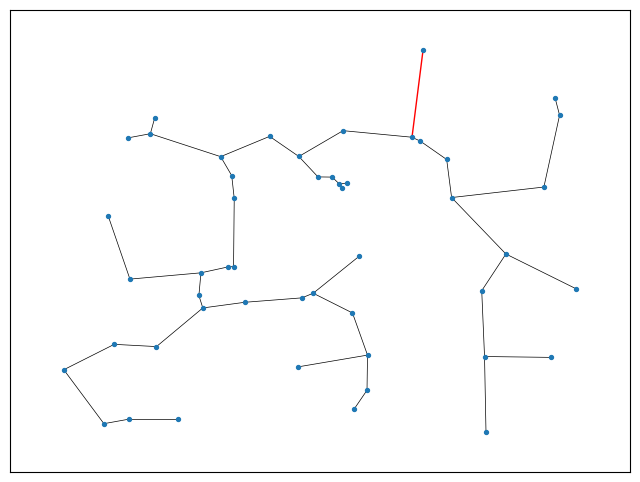

In [24]:
solution_dbst_minsum = DBSTSolverIP(points, remaining_edges, degree).solve(minsum=True)
draw_edges(solution_dbst_minsum)